In [23]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns

In [24]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

In [25]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])

Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 2
Silhouette Coefficient: 0.417
Number of clusters: 3
Silhouette Coefficient: 0.257
Number of clusters: 3
Silhouette Coefficient: 0.257
Number of clusters: 3
Silhouette Coefficient: 0.257
Number of clusters: 3
Silhouette Coefficient: 0.257
Number of clusters: 3
Silhouette Coefficient: 0.257
Number of clusters: 3
Silhouette Coefficient: 0.257
Number of clusters: 3
Silhouette Coefficient: 0.257
Number of clusters: 3
Silhouette Coefficient: 0.257
Number of clusters: 3
Silhouette Coefficient: 0.257
Number of cl

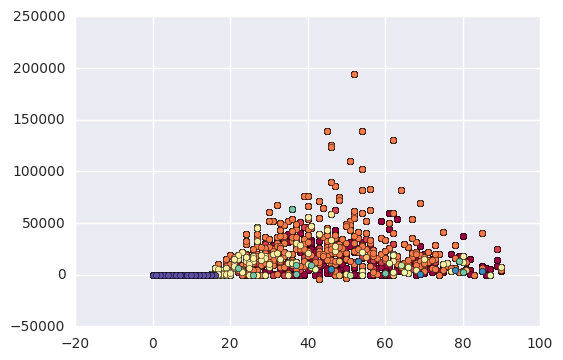

In [26]:

X = df_demo.values[np.random.choice(df_demo.values.shape[0], 1000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)
lista=[] 
df=pd.DataFrame()
n_clusters=2

while n_clusters <=10:
    
    for i in range(0, 10):
# K Means
#        labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)
# AgglomerativeClustering
        labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)
        print('Number of clusters: %d' % n_clusters)
        t=metrics.silhouette_score(X_db, labels)
        print("Silhouette Coefficient: %0.3f"
              % t )
        lista.append([t,n_clusters])

        unique_labels = set(labels)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        for k, col in zip(unique_labels, colors):
            if k == -1:
            # Black used for noise.
                col = 'k'
            class_member_mask = (labels == k)

            xy = X[class_member_mask]
            plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

            xy = X[class_member_mask]
            plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
  
   
    n_clusters = n_clusters + 1

lista
df = pd.DataFrame(lista)
df.columns=["sc","n_clusters"]

In [27]:
df

,sc,n_clusters
0,0.417126,2
1,0.417126,2
2,0.417126,2
3,0.417126,2
4,0.417126,2
5,0.417126,2
6,0.417126,2
7,0.417126,2
8,0.417126,2
9,0.417126,2


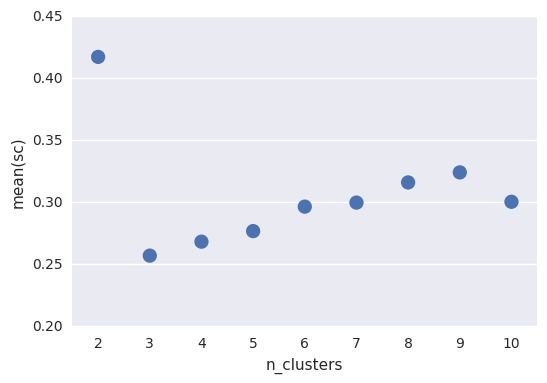

In [28]:
sns.pointplot(x="n_clusters", y="sc", data=df, join=False)